In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from math import sin, cos, pi

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

In [3]:
def trajectory(theta,speed=20,height=0,dt=0.01,g=-9.81):
    vx = 20 * cos(pi * theta / 180)
    vz = 20 * sin(pi * theta / 180)
    t,x,z = 0, 0, height
    ts, xs, zs = [t], [x], [z]
    while z >= 0:
        t += dt
        vz += g * dt
        x += vx * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        zs.append(z)
    return ts, xs, zs
        

In [4]:
1/0.003

333.3333333333333

In [5]:
def plot_trajectories(*trajs,show_seconds=False):
    for traj in trajs:
        xs, zs = traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices = []
            second = 0
            for i,t in enumerate(traj[0]):
                if t>= second:
                    second_indices.append(i)
                    second += 1
            plt.scatter([xs[i] for i in second_indices], [zs[i] for i in second_indices])
    xl = plt.xlim()
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    
    width = 7
    coords_height = (plt.ylim()[1] - plt.ylim()[0])
    coords_width = (plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width , width * coords_height / coords_width)

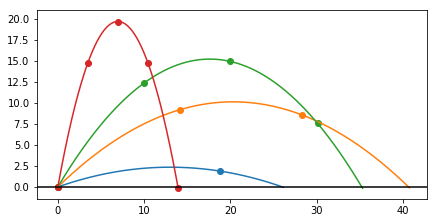

In [6]:
plot_trajectories(
    trajectory(20), 
    trajectory(45),
    trajectory(60),
    trajectory(80), 
    show_seconds=True)

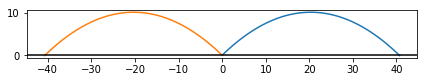

In [7]:
plot_trajectories(
    trajectory(45),
    trajectory(135))

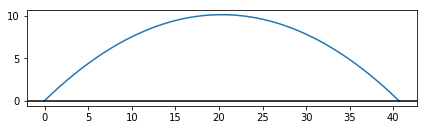

In [8]:
plot_trajectories( 
    trajectory(45),
#     trajectory(60),
)

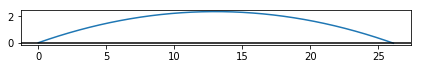

In [9]:
plot_trajectories(trajectory(20))

In [10]:
def landing_position(traj):
    return traj[1][-1]

def hang_time(traj):
    return traj[0][-1]

def max_height(traj):
    return max(traj[2])

In [11]:
hang_time(trajectory(80))

4.009999999999959

In [12]:
landing_position(trajectory(50))

40.10994684444007

In [13]:
landing_position(trajectory(130))

-40.10994684444007

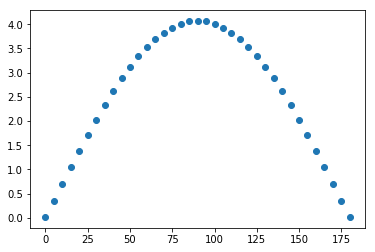

In [14]:
test_angles = range(0,181,5)
hang_times = [hang_time(trajectory(theta)) for theta in test_angles]
plt.scatter(test_angles, hang_times)

In [15]:
def plot_trajectory_metric(metric,thetas,**settings):
    plt.scatter(thetas,[metric(trajectory(theta,**settings)) for theta in thetas])

Text(0.5,0,'Launch angle (degrees)')

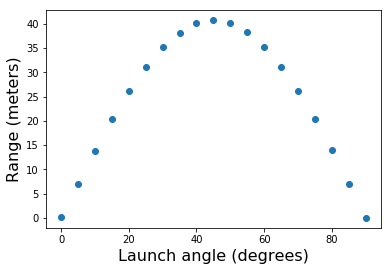

In [18]:
import matplotlib.pyplot as plt
angles = range(0,91,5)
landing_positions = [landing_position(trajectory(theta)) for theta in angles]
plt.scatter(angles,landing_positions)
plt.ylabel('Range (meters)',fontsize=16)
plt.xlabel('Launch angle (degrees)',fontsize=16)

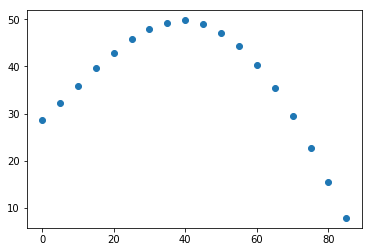

In [16]:
plot_trajectory_metric(landing_position,range(0,90,5),height=10)

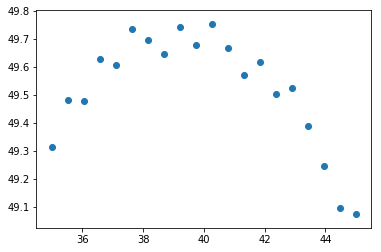

In [17]:
plot_trajectory_metric(landing_position,np.linspace(35,45,20),height=10)

2.8799999999999826

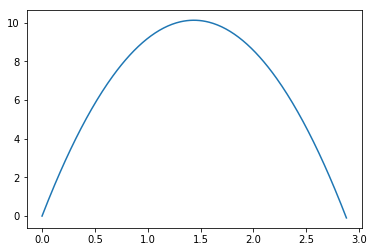

In [18]:
trj = trajectory(45)
ts, zs = trj[0], trj[2]
plt.plot(ts,zs)
ts[-1]

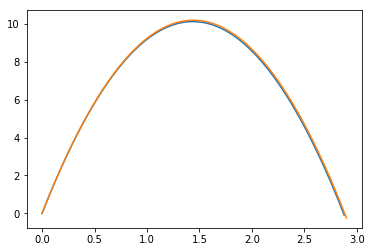

In [19]:
def z(t):
    return 20*sin(45*pi/180)*t + (-9.81/2)*t**2

trj = trajectory(45)
ts, zs = trj[0], trj[2]
plt.plot(ts,zs)
ts[-1]

plot_function(z,0,2.9)

In [20]:
-2 * (20 * sin(45*pi/180))/-9.81

2.8832080782326095

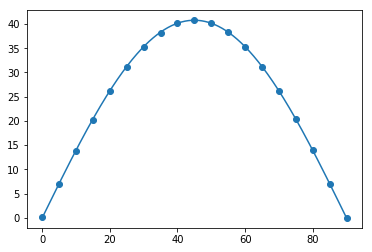

In [21]:
plot_trajectory_metric(landing_position,range(0,95,5))
plot_function(lambda theta:(-2*20*20/-9.81)*sin(theta*pi/180)*cos(theta*pi/180),0,90)

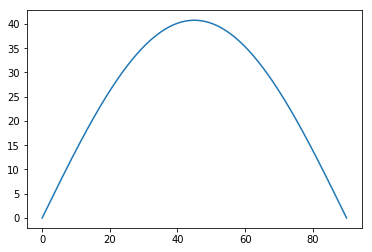

In [22]:
def r(theta):
    return (-2*20*20/-9.81)*sin(theta*pi/180)*cos(theta*pi/180)

plot_function(r,0,90)

In [23]:
r(45)

40.774719673802245

In [24]:
r(135)

-40.77471967380224

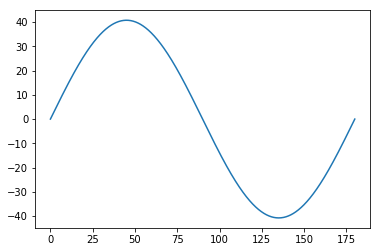

In [25]:
plot_function(r,0,180)

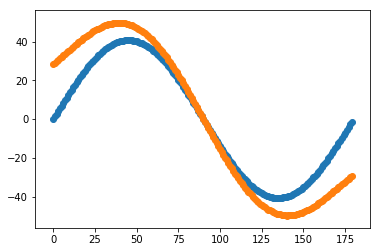

In [26]:
plot_trajectory_metric(landing_position,range(0,180),height=0)
plot_trajectory_metric(landing_position,range(0,180),height=10)

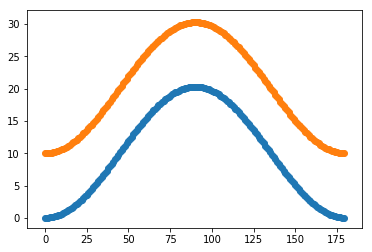

In [27]:
plot_trajectory_metric(max_height,range(0,180))
plot_trajectory_metric(max_height,range(0,180),height=10)

In [28]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81):
    vx = 20 * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = 20 * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = 20 * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= 0:
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [29]:
def plot_trajectory3d(traj):
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')
    ax.plot(traj[1],traj[2],traj[3])

C:\Users\Paul\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  after removing the cwd from sys.path.
C:\Users\Paul\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


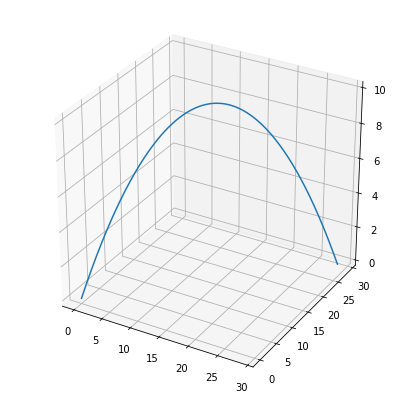

In [30]:
plot_trajectory3d(trajectory3d(45,45))

In [31]:
def flat_ground(x,y):
    return 0

def ridge(x,y):
    return (x**2 - 5*y**2) / 1000

def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81,elevation=flat_ground):
    vx = speed * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = speed * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = speed * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= elevation(x,y):
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [32]:
def plot_trajectories_3d(*trajs,elevation=flat_ground,bounds=None,zbounds=None,shadows=False):
    fig, ax = plt.gcf(), plt.gca(projection='3d')
    fig.set_size_inches(7,7)    

    if not bounds:
        xmin = min([x for traj in trajs for x in traj[1]])
        xmax = max([x for traj in trajs for x in traj[1]])
        ymin = min([x for traj in trajs for x in traj[2]])
        ymax = max([x for traj in trajs for x in traj[2]])

        padding_x = 0.1 * (xmax-xmin)
        padding_y = 0.1 * (ymax-ymin)
        xmin -= padding_x
        xmax += padding_x
        ymin -= padding_y
        ymax += padding_x
    
    else:
        xmin, xmax, ymin, ymax = bounds
    

    plt.plot([xmin,xmax],[0,0],[0,0],c='k')
    plt.plot([0,0],[ymin,ymax],[0,0],c='k')

    g = np.vectorize(elevation)
    ground_x = np.linspace(xmin, xmax, 20)
    ground_y = np.linspace(ymin, ymax, 20)
    ground_x, ground_y = np.meshgrid(ground_x,ground_y)
    ground_z = g(ground_x,ground_y)
    ax.plot_surface(ground_x, ground_y, ground_z, cmap=cm.coolwarm, alpha=0.5,
                       linewidth=0, antialiased=True)
    for traj in trajs:
        ax.plot(traj[1],traj[2],traj[3])
        if shadows:
            ax.plot([traj[1][0],traj[1][-1]],[traj[2][0],traj[2][-1]],[0,0],c='gray',linestyle='dashed')
    
    if zbounds:
        ax.set_zlim(*zbounds)
    

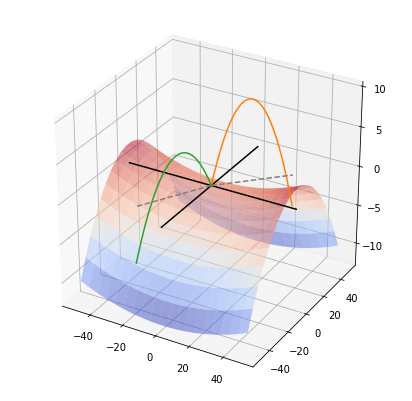

In [33]:
plot_trajectories_3d(
    trajectory3d(45,45,elevation=ridge),
    trajectory3d(30,-120,elevation=ridge),
    elevation=ridge, bounds=[-50,50,-50,50],shadows=True)

(37.58114751557887, 89.99992616039857)

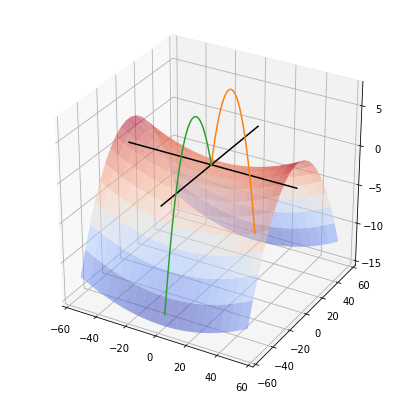

In [34]:
plot_trajectories_3d(
    trajectory3d(37.58114751557887, 90,elevation=ridge),
    trajectory3d(37.58114751557887, 270,elevation=ridge),
    bounds=[-55,55,-55,55],
    elevation=ridge)

(37.58114751557887, 89.99992616039857)

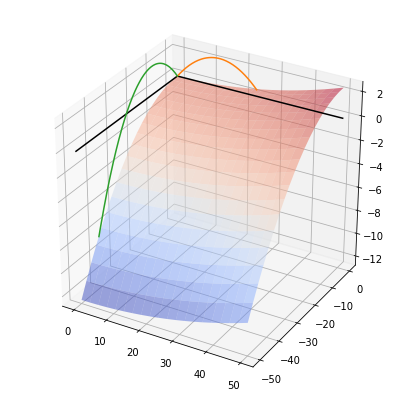

In [35]:
plot_trajectories_3d(
    trajectory3d(20,0,elevation=ridge),
    trajectory3d(20,270,elevation=ridge),
    bounds=[0,50,-50,0],
    elevation=ridge)

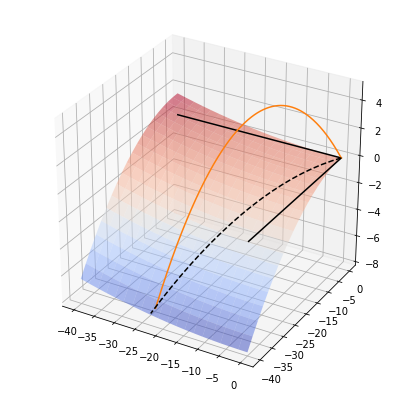

In [36]:
from math import tan
plot_trajectories_3d(
    trajectory3d(30,240,elevation=ridge),
    bounds=[-40,0,-40,0],
    elevation=ridge)

X = np.linspace(0,-23,20)
Y = tan(240 * pi / 180) * X
plt.plot(X,Y,[ridge(x,y) for (x,y) in zip(X,Y)],c='k',linestyle='dashed')

In [37]:
# from math import tan
# # vz = 20*sin(30*pi/180)

# # v = 20
# # theta = 30*pi/180
# # phi = 240*pi/180

# # def z(x):
# #     return vz*(x/vx) + (-9.81/2)*(x/vx)**2

# def landing_x(theta_deg,phi_deg):
#     theta = theta_deg * pi / 180
#     phi = phi_deg * pi / 180
#     v = 20
#     vx = v * cos(theta) * cos(phi)
#     B, C = 0.001, 0.005  
#     a = ((-9.81)/(2*vx**2) + C * tan(phi)**2 - B)
#     b = tan(theta)/cos(phi)
#     return - b / a
    
# def r(theta,phi):
#     return landing_x(theta,phi) / sin(phi*pi/180)
    
# def draw_slice(theta,phi,elevation=flat_ground):
#     v=20
#     vx = v * cos(theta*pi/180) * cos(phi*pi/180)
#     vz = 20*sin(30*pi/180)
#     print(vx,vz)
#     def z(x):
        
#         return vz*(x/vx) + (-9.81/2)*(x/vx)**2
#     def h(x):
#         return elevation(x,x*tan(phi*pi/180))
# #     plot_function(z, 0, -22.5,c='C1')
#     trj = trajectory3d(theta,phi,elevation=elevation)
#     plt.plot(trj[1],trj[3])
#     plot_function(h,0,-25,c='k',linestyle='dashed')
#     plot_function(lambda x : 0,-25,0,c='k')
#     x = landing_x(theta,phi)
#     plt.scatter([x],[z(x)],c='k')

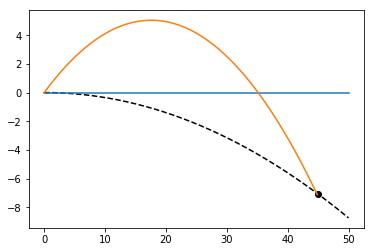

In [38]:
from math import sqrt


 

    
def elevation_below(theta,phi,t):
    return t**2 * (20**2) * cos(theta*pi/180)**2 * (B*cos(phi*pi/180)**2 - C*sin(phi*pi/180)**2)

def z(theta,phi,t):
    return v*sin(theta*pi/180)*t + (g/2) * t**2

def v_xy(theta):
    return v * sin

#     def altitude(t):
#         return a*t**2 + b*t

B = 0.001
C = 0.005
v = 20
g = -9.81

def velocity_components(v,theta,phi):
    vx = v * cos(theta*pi/180) * cos(phi*pi/180)
    vy = v * cos(theta*pi/180) * sin(phi*pi/180)
    vz = v * sin(theta*pi/180)
    return vx,vy,vz
    
def landing_distance(theta,phi):
    vx, vy, vz = velocity_components(v, theta, phi)
    v_xy = sqrt(vx**2 + vy**2)
    a = (g/2) - B * vx**2 + C * vy**2
    b = vz
    landing_time = -b/a
    landing_distance = v_xy * landing_time
    return landing_distance

def draw_slice(theta,phi):
    vx, vy, vz = velocity_components(v, theta, phi)
    v_xy = sqrt(vx**2 + vy**2)
    plot_function(lambda d: elevation_below(theta,phi,d/v_xy),0,50,c='k',linestyle='dashed')
    #     plot_function(lambda d: alt(d/v_horiz),0,50)
    plot_function(lambda d: 0, 0,50)

    sim = trajectory3d(theta,phi,elevation=ridge)
    plt.plot([sqrt(x**2+y**2) for x,y in zip(sim[1],sim[2])], sim[3])

    
    landing = landing_distance(theta,phi)
    landing_time = landing / v_xy
    plt.scatter([landing], [elevation_below(theta,phi,landing_time)],c='k')


draw_slice(30,240)



In [39]:
v_horiz=v*cos(30*pi/180)
# plot_function(lambda d: z(30,240,d/v_horiz),0,50)


In [40]:
v_horiz

17.320508075688775

In [41]:
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)

    fv = np.vectorize(f)

    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    z = fv(X,Y)
    
#     # x and y are bounds, so z should be the value *inside* those bounds.
#     # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)


Text(0,0.5,'phi')

<Figure size 504x504 with 0 Axes>

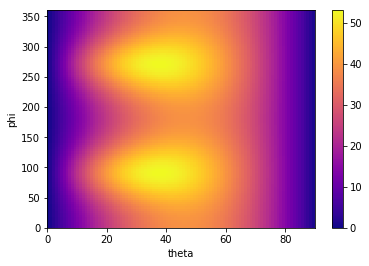

In [42]:
scalar_field_heatmap(landing_distance,0,90,0,360)
plt.xlabel('theta')
plt.ylabel('phi')


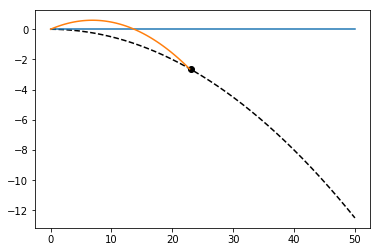

In [43]:
draw_slice(10,270)

In [44]:
def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

def approx_gradient(f,x0,y0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y),y0,dx=dx)
    return (partial_x,partial_y)
    

In [45]:
def landing_distance_gradient(theta,phi):
    return approx_gradient(landing_distance, theta, phi)

<Figure size 504x504 with 0 Axes>

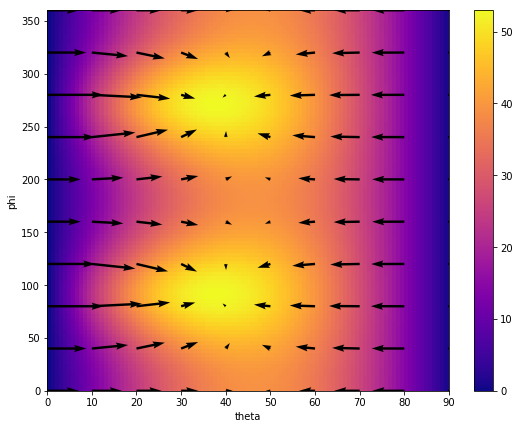

In [46]:
from vectors import to_polar, to_cartesian

def draw_arrow(tip,tail,color='k'):
    tip_length = (plt.xlim()[1] - plt.xlim()[0]) / 20.
    length = sqrt((tip[1]-tail[1])**2 + (tip[0]-tail[0])**2)
    new_length = length - tip_length
    new_y = (tip[1] - tail[1]) * (new_length / length)
    new_x = (tip[0] - tail[0]) * (new_length / length)
    plt.gca().arrow(tail[0], tail[1], new_x, new_y,
    head_width=tip_length/1.5, 
    head_length=tip_length/2,
    fc=color, ec=color)
    
def plot_vector_field(f,xmin,xmax,ymin,ymax,xsteps=10,ysteps=10,color='k'):

    X,Y = np.meshgrid(np.linspace(xmin,xmax, xsteps),np.linspace(ymin,ymax, ysteps))
    U = np.vectorize(lambda x,y : f(x,y)[0])(X,Y)
    V = np.vectorize(lambda x,y : f(x,y)[1])(X,Y)
    plt.quiver(X, Y, U, V,color=color)
    fig = plt.gcf()
    
# def plot_vector_field(f,xmin,xmax,ymin,ymax,xsteps=10,ysteps=10,scale=1.0,**kwargs):
#     for x in np.linspace(xmin,xmax,xsteps):
#         for y in np.linspace(ymin,ymax,ysteps):
#             vx,vy = f(x,y)
# #             y_stretch = (plt.ylim()[1] - plt.ylim()[0]) / (plt.xlim()[1] - plt.xlim()[0])
# #             v = scale * vx , scale * vy
# #             r,t = to_polar((v[0], v[1]*y_stretch))
#             tick_right = to_cartesian((0.3*r,t+2*pi/3))
#             tick_left = to_cartesian((0.3*r,t-2*pi/3))
# #             draw_arrow((x,y),(x+vx,y+vy))
#             plt.plot([x,x+vx],[y,y+vy],c='k')
# #             plt.plot([x+v[0],x+vx+tick_right[0]],[y+vy,y+vy+tick_right[1]],c='k')
# #             plt.plot([x+v[0],x+v[0]+tick_left[0]],[y+vy,y+vy+tick_left[1]],c='k')
    
scalar_field_heatmap(landing_distance,0,90,0,360)
plot_vector_field(landing_distance_gradient,0,90,0,360,xsteps=10,ysteps=10,color='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

<Figure size 504x504 with 0 Axes>

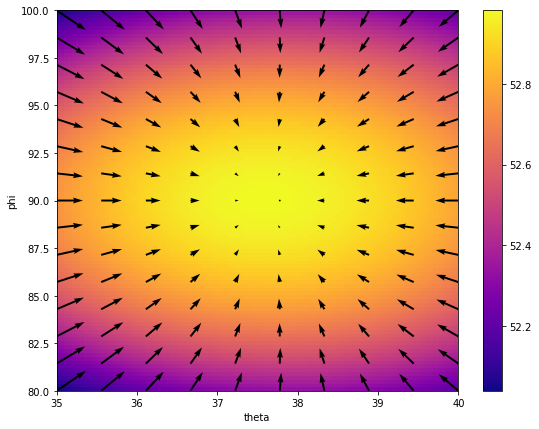

In [47]:
scalar_field_heatmap(landing_distance,35,40,80,100)
plot_vector_field(landing_distance_gradient,35,40,80,100,xsteps=10,ysteps=15,color='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

In [48]:
from vectors import length

def gradient_ascent(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
    return x,y

def gradient_ascent_points(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [49]:
gradient_ascent(landing_distance,36,83)

(37.58114751557887, 89.99992616039857)

In [50]:
landing_distance(37.58114751557887, 89.99992616039857)

52.98310689354378

In [51]:
len(gradient_ascent_points(landing_distance,36,83)[0])

855

<Figure size 504x504 with 0 Axes>

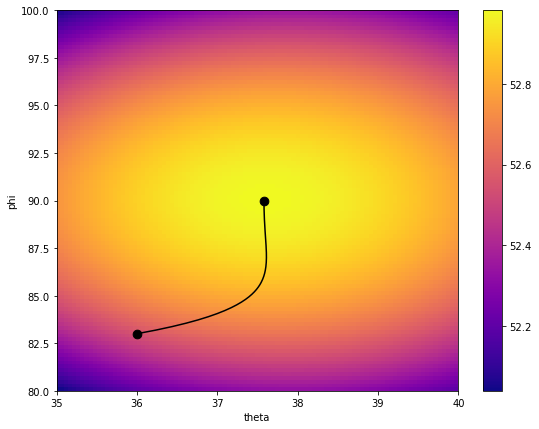

In [52]:
from vectors import to_polar, to_cartesian
scalar_field_heatmap(landing_distance,35,40,80,100)
plt.scatter([36,37.58114751557887],[83,89.99992616039857],c='k',s=75)
plt.plot(*gradient_ascent_points(landing_distance,36,83),c='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

<Figure size 504x504 with 0 Axes>

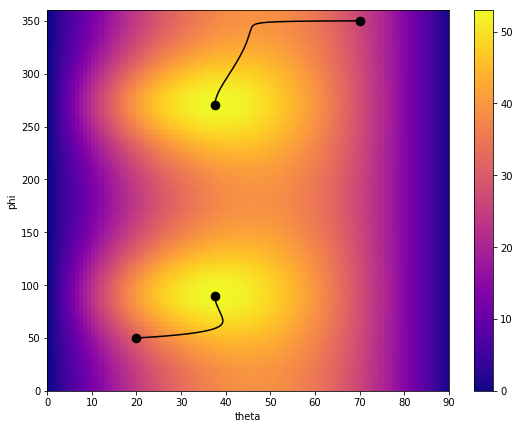

In [53]:
from vectors import to_polar, to_cartesian
scalar_field_heatmap(landing_distance,0,90,0,360)
plt.scatter([20,37.58114751557887],[50,270],c='k',s=75)
plt.scatter([70,37.58114751557887],[350,89.99992616039857],c='k',s=75)
plt.plot(*gradient_ascent_points(landing_distance,20,50),c='k')
plt.plot(*gradient_ascent_points(landing_distance,70,350),c='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

<Figure size 504x504 with 0 Axes>

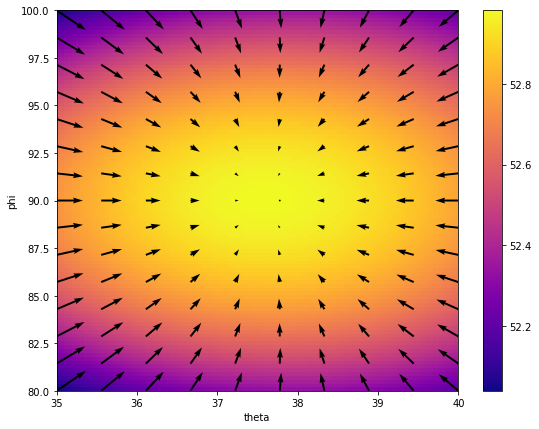

In [54]:
from vectors import to_polar, to_cartesian
scalar_field_heatmap(landing_distance,35,40,80,100)
plot_vector_field(landing_distance_gradient,35,40,80,100,xsteps=10,ysteps=15,color='k')
plt.xlabel('theta')
plt.ylabel('phi')

# gap = gradient_ascent_points(landing_distance,36,83)
# plt.plot(*gap,c='k')
# print(gap[0][0],gap[1][0])
# print(approx_gradient(landing_distance,36,83))
# print(gap[0][1],gap[1][1])

# plt.scatter([gap[0][-1]],gap[1][-1],c='k')
# for x in np.linspace(35,40,20):
#     for y in np.linspace(80,100,20):
#         grad = approx_gradient(landing_distance,x,y)
#         r,t = to_polar(grad)
#         tick_right = to_cartesian((0.3*r,t+2*pi/3))
#         tick_left = to_cartesian((0.3*r,t-2*pi/3))
#         plt.plot([x,x+grad[0]],[y,y+grad[1]],c='k')
#         plt.plot([x+grad[0],x+grad[0]+tick_right[0]],[y+grad[1],y+grad[1]+tick_right[1]],c='k')
#         plt.plot([x+grad[0],x+grad[0]+tick_left[0]],[y+grad[1],y+grad[1]+tick_left[1]],c='k')
plt.gcf().set_size_inches(9,7)

<Figure size 504x504 with 0 Axes>

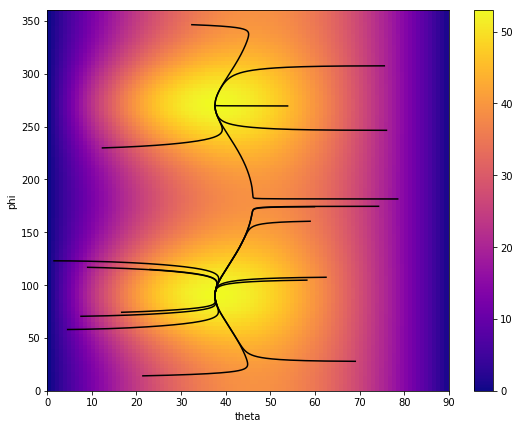

In [55]:
scalar_field_heatmap(landing_distance,0,90,0,360)
plt.xlabel('theta')
plt.ylabel('phi')
gap = gradient_ascent_points(landing_distance,60,190,1000)

from random import uniform
for x in range(0,20):
    gap = gradient_ascent_points(landing_distance,uniform(0,90),uniform(0,360))
    plt.plot(*gap,c='k')
plt.gcf().set_size_inches(9,7)

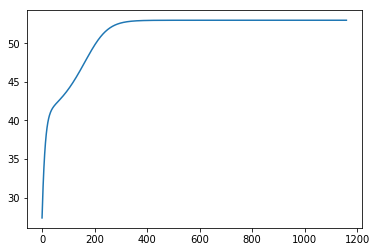

In [56]:
plt.plot(range(0,len(gap[0])), [landing_distance(theta,phi) for theta,phi in zip(gap[0],gap[1])])

In [57]:
landing_distance(gap[0][-1], gap[1][-1])

52.983106893543784

In [58]:
def plot_scalar_field(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False):
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased)

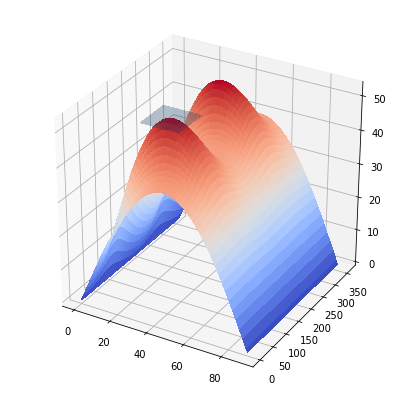

In [59]:
plot_scalar_field(landing_distance,0,90,0,360)
plot_scalar_field(lambda theta,phi: landing_distance(gap[0][-1], gap[1][-1]),27,47,50,130,xsteps=2,ysteps=2,alpha=0.3,c='C0',cmap=None)

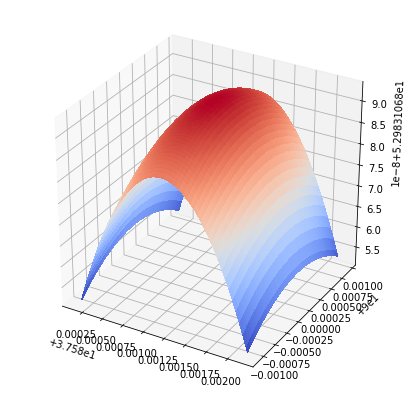

In [60]:
ldx, ldy = gap[0][-1],gap[1][-1]
plot_scalar_field(landing_distance,ldx-0.001,ldx+0.001,ldy-0.001,ldy+0.001)

In [61]:
landing_distance(0,0)

0.0

In [62]:
gradient_ascent_points(landing_distance,0,180,1000)[0][-1]

0

In [63]:
approx_gradient(landing_distance,46.12263347694777,180)

(0.0, 0.0)

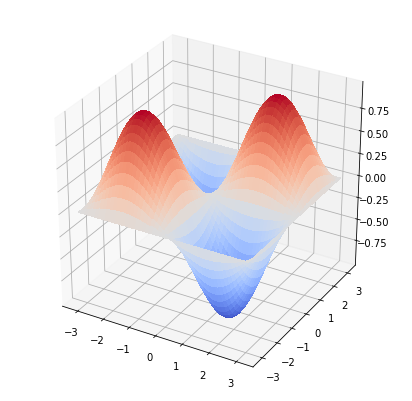

In [64]:
plot_scalar_field(lambda x,y:sin(x)*sin(y),-pi,pi,-pi,pi)

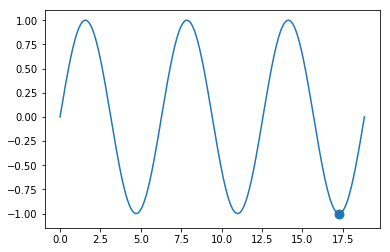

In [65]:
plot_function(sin,0,12*pi/2)
plt.scatter([11*pi/2],[-1],s=80)
# plot_function(lambda x: 0,0,12*pi/2, c='k')

In [66]:
gradient_ascent(landing_distance,0,180)

(46.122613357930206, 180.0)

In [67]:
gap = gradient_ascent_points(landing_distance,80,180)

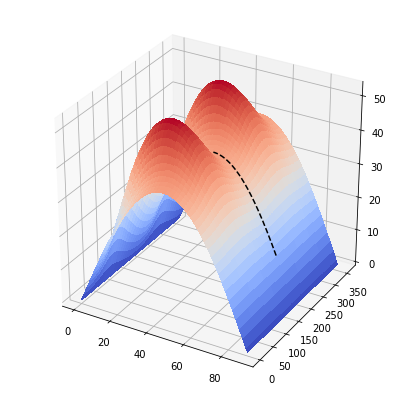

In [68]:
plot_scalar_field(landing_distance,0,90,0,360)
plt.plot(gap[0],gap[1],[landing_distance(theta,phi) for theta,phi in zip(gap[0],gap[1])],c='k',linestyle='dashed')
# plt.scatter([46.122613357930206],[180.0],[39.207],c='k')

In [69]:
landing_distance(gap[0][-1], gap[1][-1])

39.20737763278812

In [70]:
def simulated_distance_270(theta):
    ts,xs,ys,zs = trajectory3d(theta,270)
    return sqrt(xs[-1]**2 + ys[-1]**2)

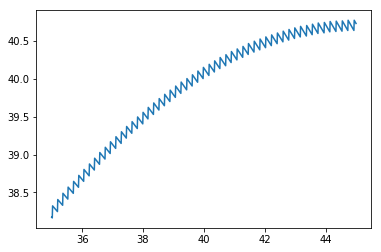

In [71]:
plot_function(simulated_distance_270,35,45)

In [72]:
def gradient_descent(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        grad = approx_gradient(f,x,y)
    return x,y

In [73]:
def p(x,y):
    return (x-3)**2 + (y-4)**2

<Figure size 504x504 with 0 Axes>

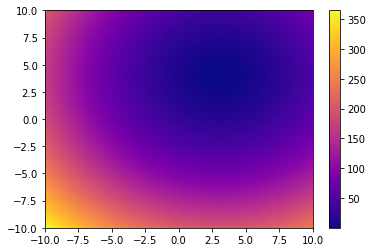

In [74]:
gradient_descent(p,0,0)
scalar_field_heatmap(p,-10,10,-10,10)
plt.plot(*gap,c='k')

In [75]:
gradient_descent(p,0,0)


(2.999999701097424, 3.9999996014632337)

In [76]:
def gradient_ascent_points(f,xstart,ystart,rate=1,tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += rate * grad[0]
        y += rate * grad[1]
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [77]:
def count_ascent_steps(f,x,y,rate=1):
    gap = gradient_ascent_points(f,x,y,rate=rate)
    print(gap[0][-1],gap[1][-1])
    return len(gap[0])
    
count_ascent_steps(landing_distance,36,83)

37.58114751557887 89.99992616039857


855

In [78]:
count_ascent_steps(landing_distance,36,83,rate=1.5)

37.58114755288237 89.99992556887184


568

<Figure size 504x504 with 0 Axes>

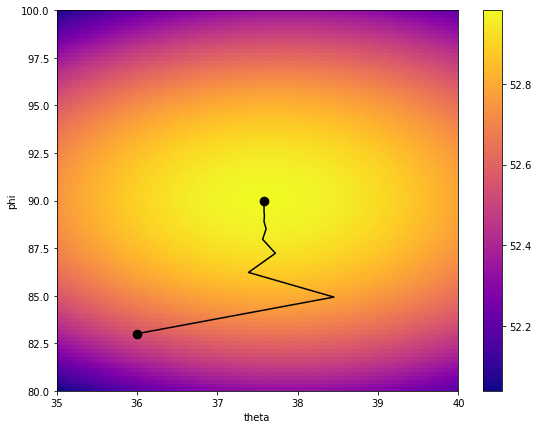

In [85]:
scalar_field_heatmap(landing_distance,35,40,80,100)
plt.scatter([36,37.58114751557887],[83,89.99992616039857],c='k',s=75)
# plt.plot(*gradient_ascent_points(landing_distance,36,83,rate=1),c='k')
# plt.plot(*gradient_ascent_points(landing_distance,36,83,rate=3),c='k')
# plt.plot(*gradient_ascent_points(landing_distance,36,83,rate=10),c='k')
plt.plot(*gradient_ascent_points(landing_distance,36,83,rate=20),c='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

In [80]:
count_ascent_steps(landing_distance,36,83,rate=3)

37.58114749426255 89.99992676791281


282

In [81]:
count_ascent_steps(landing_distance,36,83,rate=10)

37.58114748360439 89.99992495958149


81

In [82]:
count_ascent_steps(landing_distance,36,83,rate=20)

37.58114744807723 89.99992670041118


38

In [83]:
# WONT CONVERGE
# count_ascent_steps(landing_distance,36,83,rate=40)

In [86]:
37.58 * pi / 180

0.655894732899469

<Figure size 504x504 with 0 Axes>

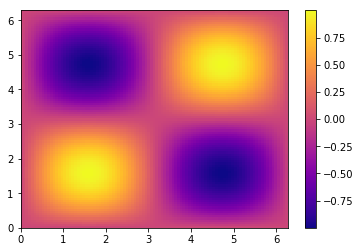

In [89]:
scalar_field_heatmap(lambda x,y:sin(x)*sin(y),0,2*pi,0,2*pi)